In [1]:
import numpy as np
import pandas as pd
import pickle
import os 
import sys
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


path_data = "/nmnt/x01-hdd/HCP/data/"

with open(path_data + "not_normed_connectomes", 'rb') as f:
    Y = pickle.load(f)
with open(path_data + "normed_connectomes", 'rb') as f:
    norm_Y = pickle.load(f)


with open(path_data + "subjects_roi_thinkness", 'rb') as f:
    roi_think = pickle.load(f)


with open(path_data + "subjects_roi_volume", 'rb') as f:
    roi_vol = pickle.load(f)

with open(path_data + "subjects_roi_area", 'rb') as f:
    roi_area = pickle.load(f)


In [2]:
sc = StandardScaler()

st_think = sc.fit_transform(roi_think)
mean_think = sc.mean_
std_think = sc.var_

st_area = sc.fit_transform(roi_area)
mean_area = sc.mean_
std_area = sc.var_

st_vol = sc.fit_transform(roi_vol)
mean_vol = sc.mean_
std_vol = sc.var_

In [3]:
wdeg = Y.sum(axis = -1)
norm_wdeg = norm_Y.sum(axis = -1)

In [4]:
max_wdeg = max(wdeg.reshape(-1))
min_wdeg = min(wdeg.reshape(-1))

max_norm_wdeg = max(norm_wdeg.reshape(-1))
min_norm_wdeg = min(norm_wdeg.reshape(-1))

max_st_think = max(st_think.reshape(-1))
min_st_think = min(st_think.reshape(-1))


max_st_area = max(st_area.reshape(-1))
min_st_area = min(st_area.reshape(-1))


max_st_vol = max(st_vol.reshape(-1))
min_st_vol = min(st_vol.reshape(-1))

# THINKNESS

In [5]:
%matplotlib inline

In [7]:
idx = np.array([i for i in range(36)]).reshape(6,6)

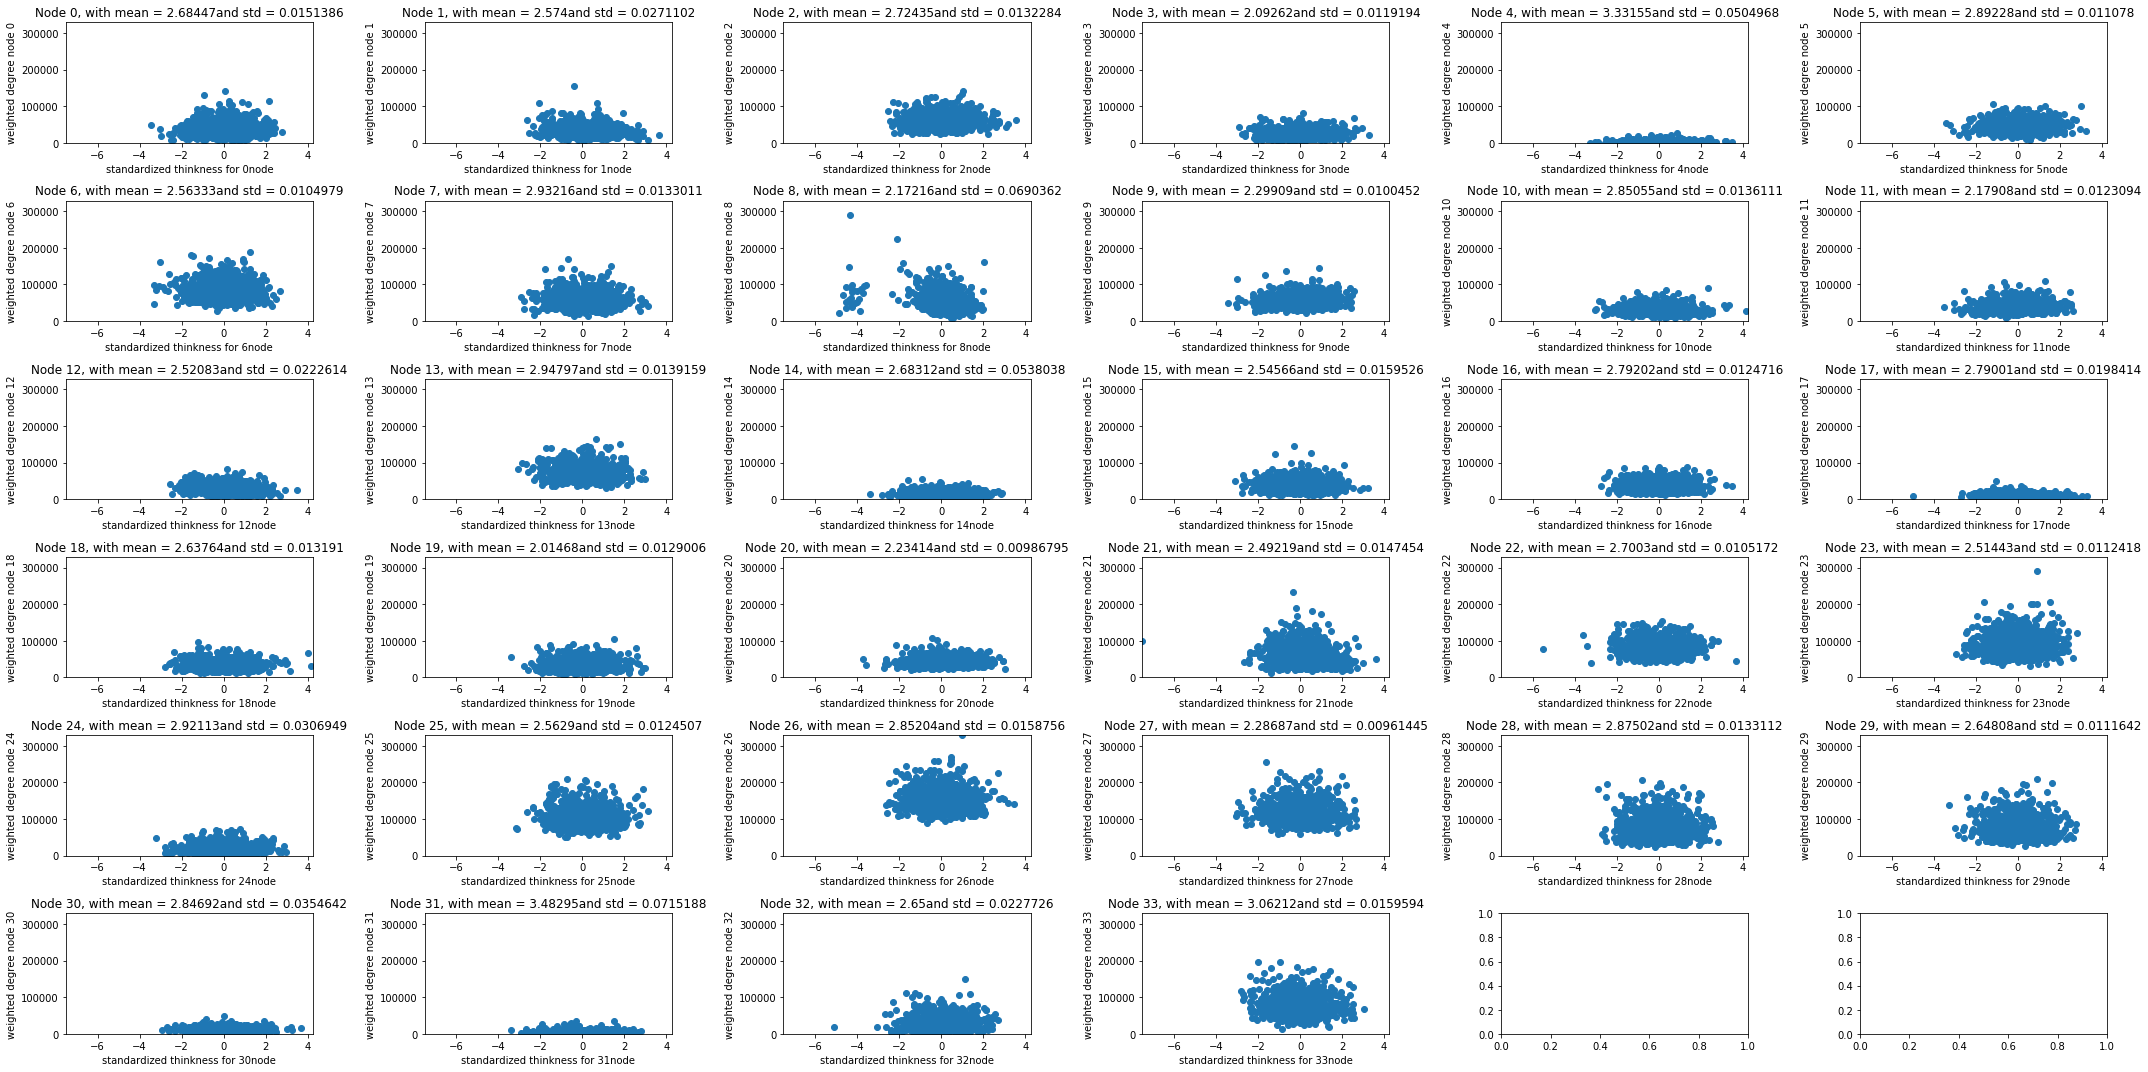

In [11]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break
        ax[i, j].scatter(st_think[:,idx[i,j]], wdeg[:,idx[i,j]])
        ax[i, j].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_think[idx[i,j]]) + 'and std = ' + str(std_think[idx[i,j]]))
        ax[i, j].set_xlabel('standardized thinkness for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('weighted degree node ' + str(idx[i,j]))
        ax[i, j].set_xlim([min_st_think, max_st_think])
        ax[i, j].set_ylim([min_wdeg, max_wdeg])
plt.tight_layout()
plt.savefig( 'thinkness_to_wdeg', dpi = 500)

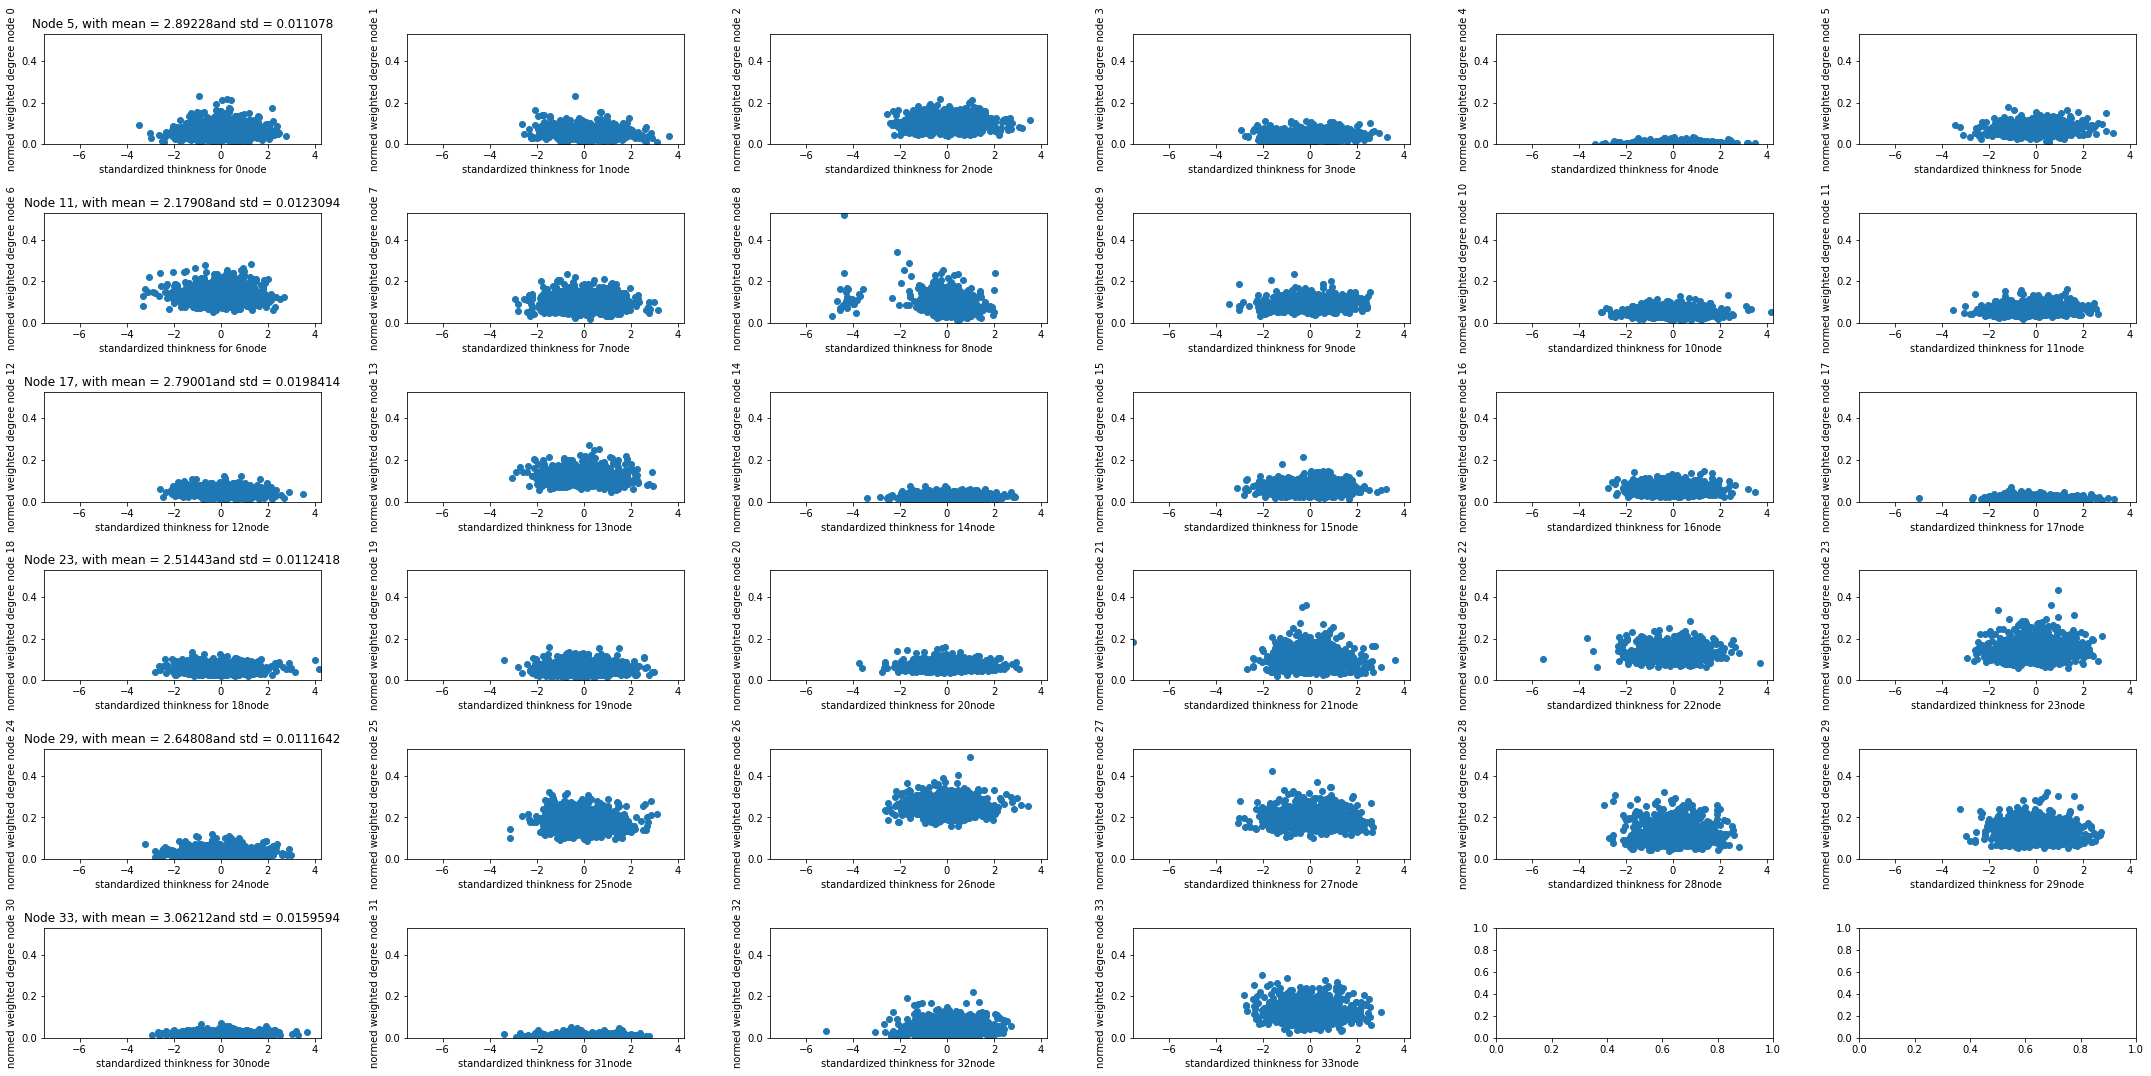

In [13]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break
        ax[i, j].scatter(st_think[:,idx[i,j]], norm_wdeg[:,idx[i,j]])
    #     ax[i, 1].scatter(st_think[:, 34 + i], norm_wdeg[:, 34+i])
        ax[i, 0].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_think[idx[i,j]]) + 'and std = ' + str(std_think[idx[i,j]]))

        ax[i, j].set_xlabel('standardized thinkness for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('normed weighted degree node ' + str(idx[i,j]))
        ax[i, j].set_xlim([min_st_think, max_st_think])
        ax[i, j].set_ylim([min_norm_wdeg, max_norm_wdeg])
plt.tight_layout()
plt.savefig('thinkness_to_norm_wdeg', dpi = 500)

# AREA

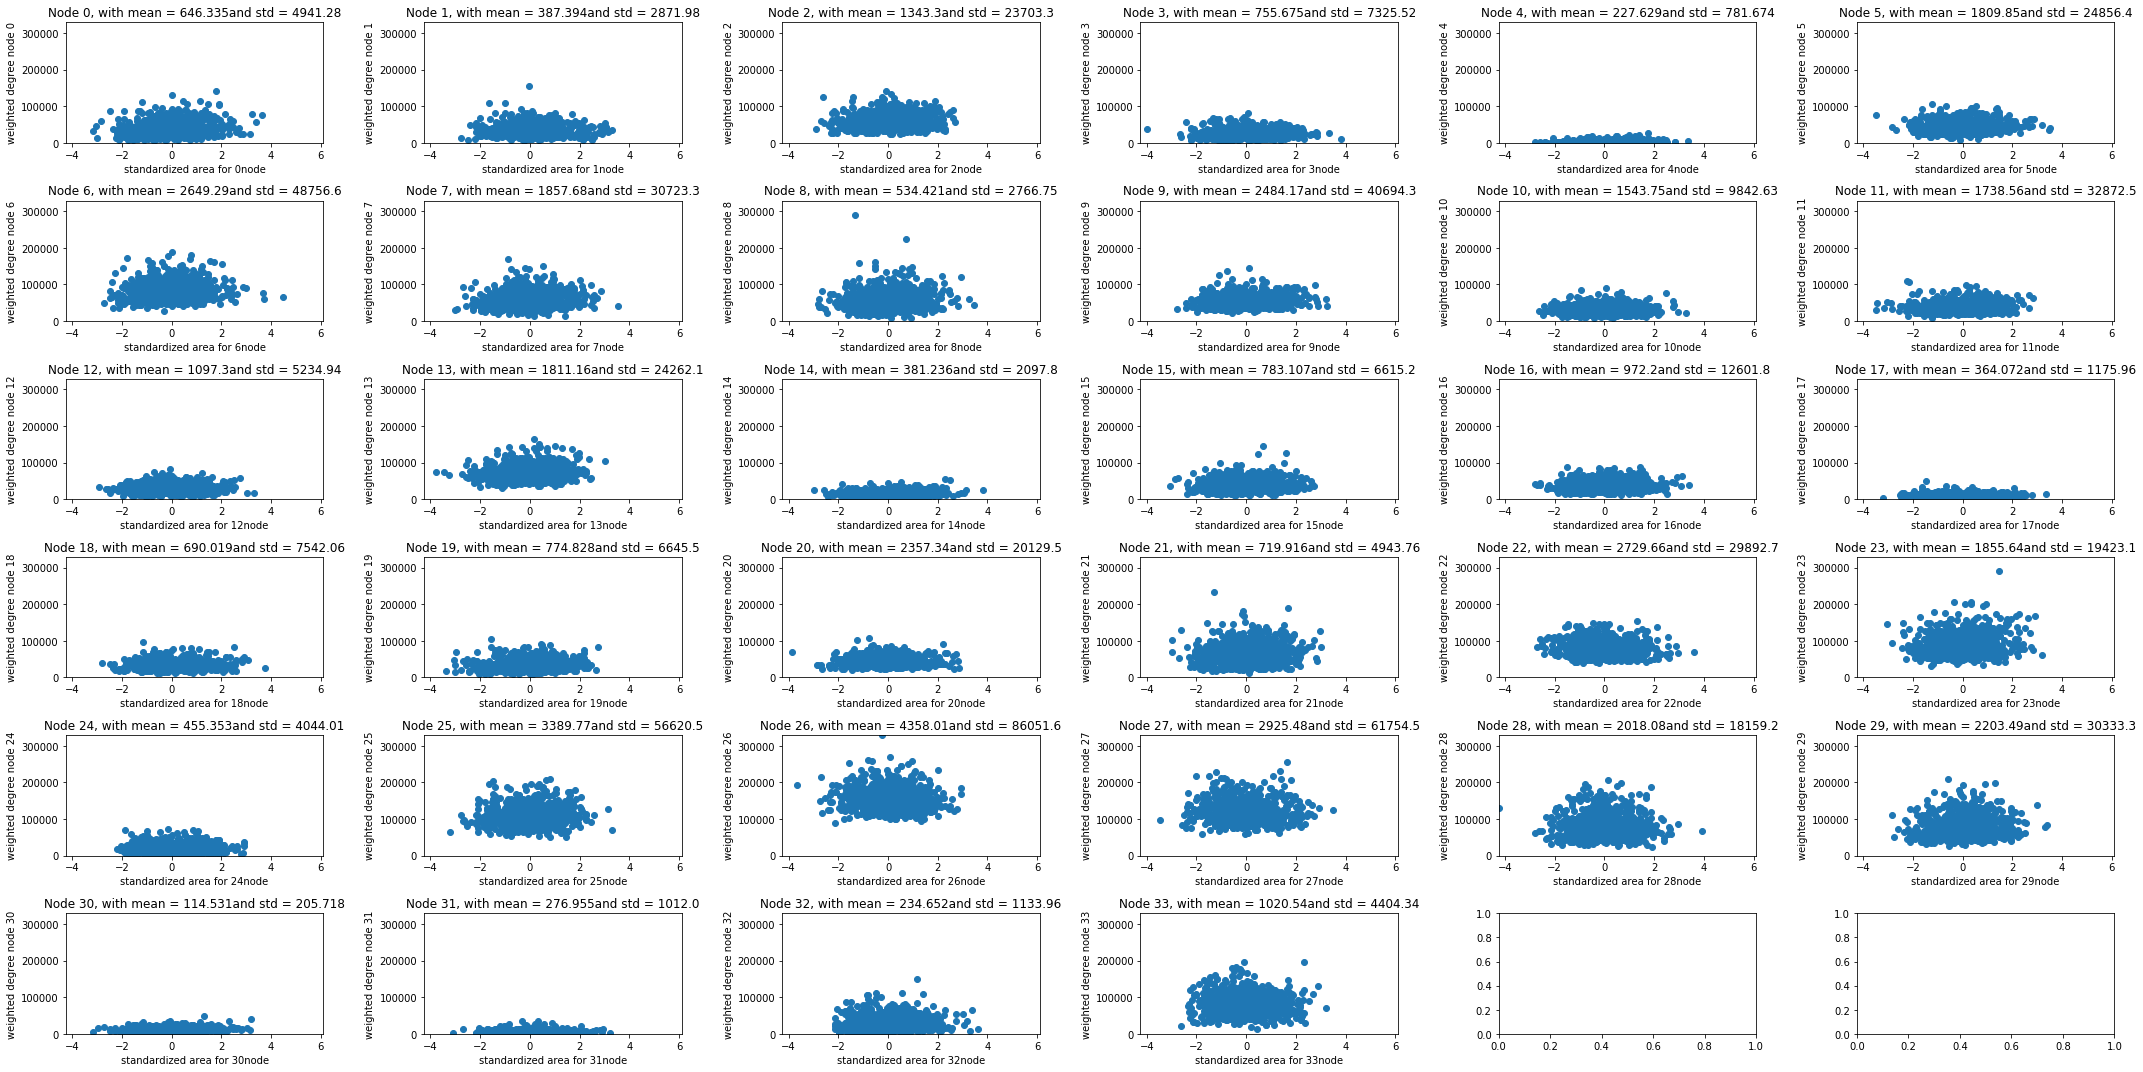

In [14]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break   
        ax[i, j].scatter(st_area[:,idx[i,j]], wdeg[:,idx[i,j]])
    #    ax[i, 1].scatter(st_area[:, 34 + i], wdeg[:, 34+i])
        ax[i, j].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_area[idx[i,j]]) + 'and std = ' + str(std_area[idx[i,j]]))

    #    ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_area[34 +i]) +'and std = ' + str(std_area[34 + i]))
        ax[i, j].set_xlabel('standardized area for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('weighted degree node ' + str(idx[i,j]))
    #    ax[i, 1].set_xlabel('standardized area for ' + str(34 + i) + 'node')
    #    ax[i, 1].set_ylabel('weighted degree node' + str(34 + i))
        ax[i, j].set_xlim([min_st_area, max_st_area])
        ax[i, j].set_ylim([min_wdeg, max_wdeg])
    #    ax[i, 1].set_xlim([min_st_area, max_st_area])
    #    ax[i, 1].set_ylim([min_wdeg, max_wdeg])
plt.tight_layout()
plt.savefig('area_to_wdeg', dpi = 500)

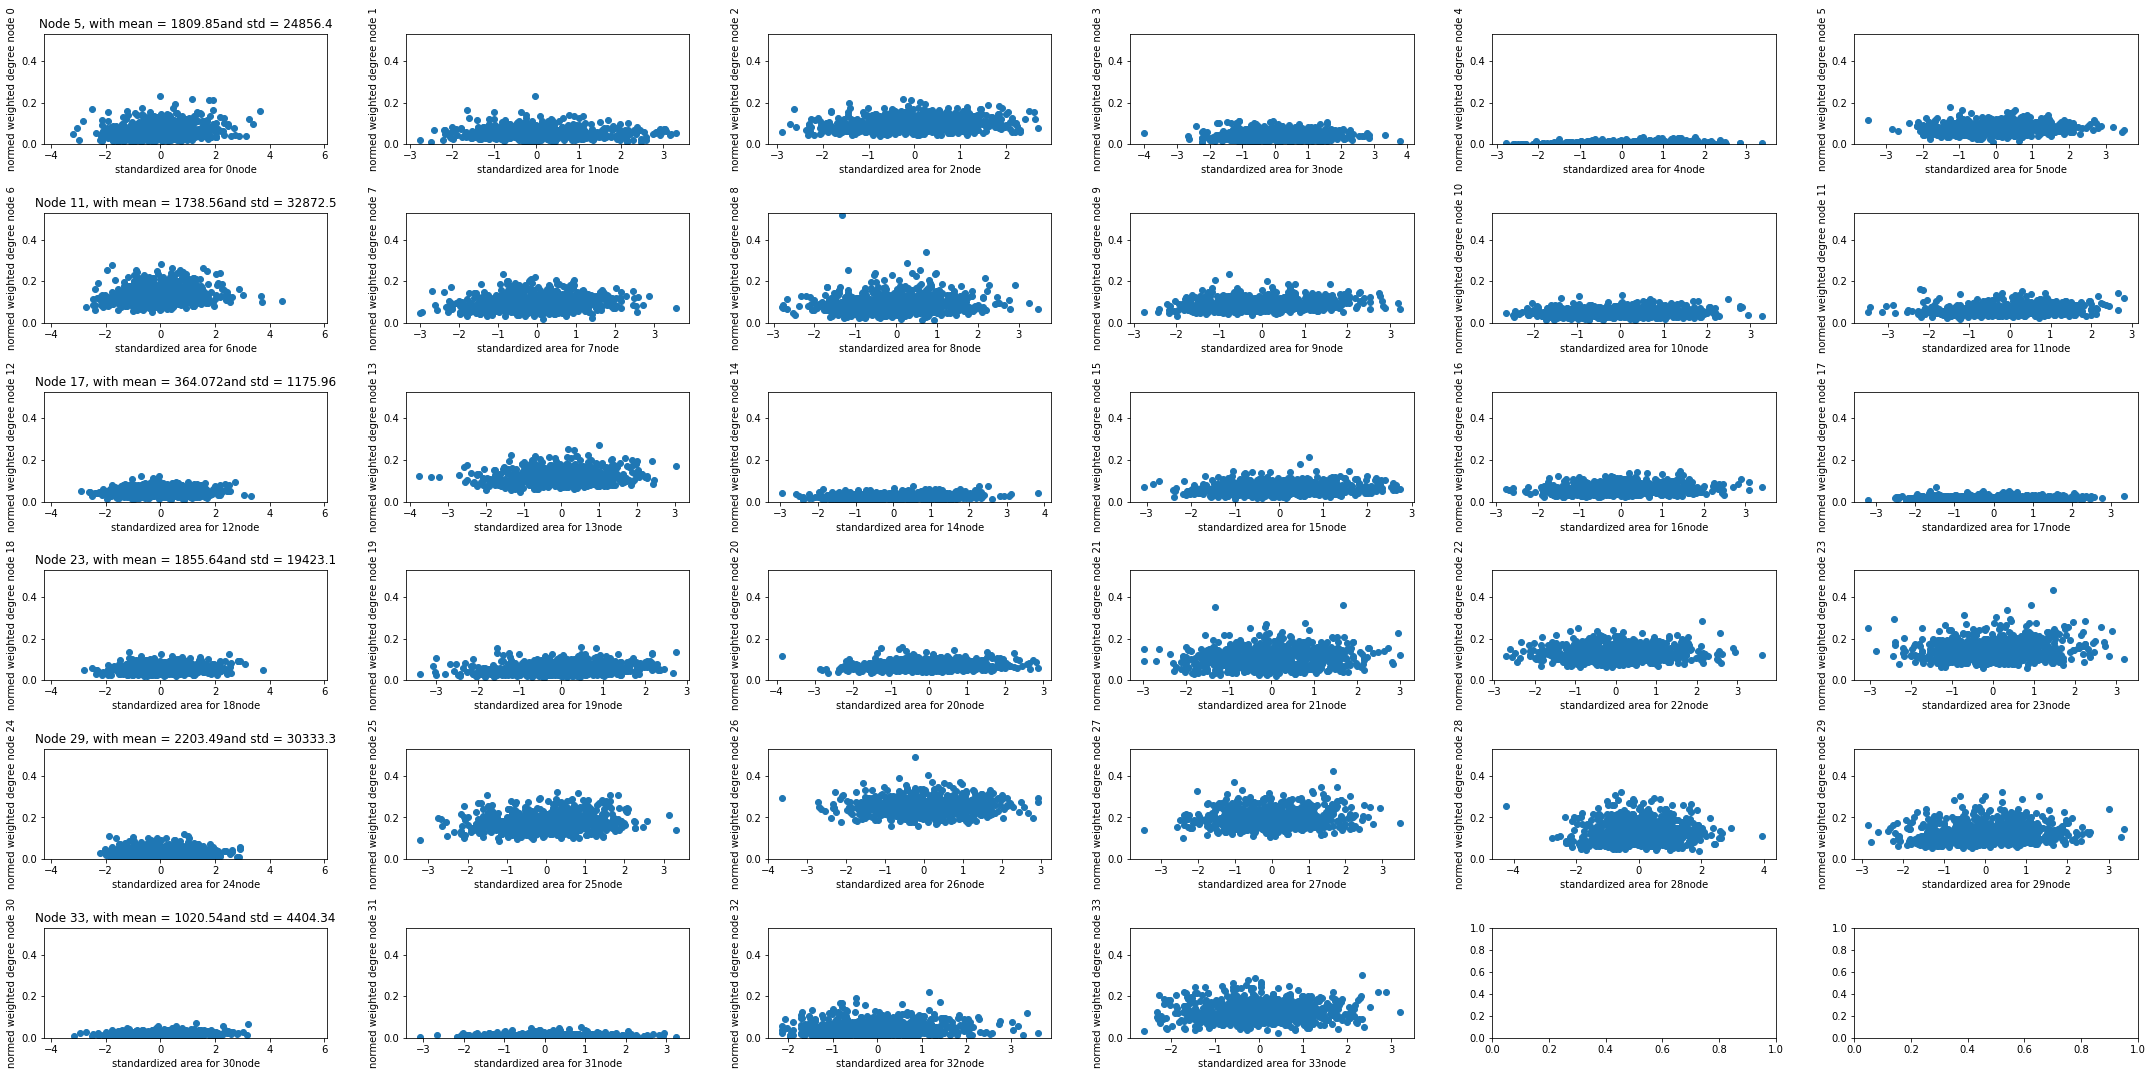

In [15]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break   
    
        ax[i, j].scatter(st_area[:,idx[i,j]], norm_wdeg[:,idx[i,j]])
        #ax[i, 1].scatter(st_area[:, 34 + i], norm_wdeg[:, 34+i])
        ax[i, 0].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_area[idx[i,j]]) + 'and std = ' + str(std_area[idx[i,j]]))

       #ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_area[34 +i]) +'and std = ' + str(std_area[34 + i]))
        ax[i, j].set_xlabel('standardized area for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('normed weighted degree node ' + str(idx[i,j]))
        #ax[i,j1].set_xlabel('standardized area for ' + str(34 + i) + 'node')
        #ax[i, 1].set_ylabel('normed weighted degree node' + str(34 + i))
        ax[i, 0].set_xlim([min_st_area, max_st_area])
        ax[i, j].set_ylim([min_norm_wdeg, max_norm_wdeg])
        #ax[i,j1].set_xlim([min_st_area, max_st_area])
        #ax[i, 1].set_ylim([min_norm_wdeg, max_norm_wdeg])
plt.tight_layout()
plt.savefig('area_to_norm_wdeg', dpi = 500)

# VOLUME

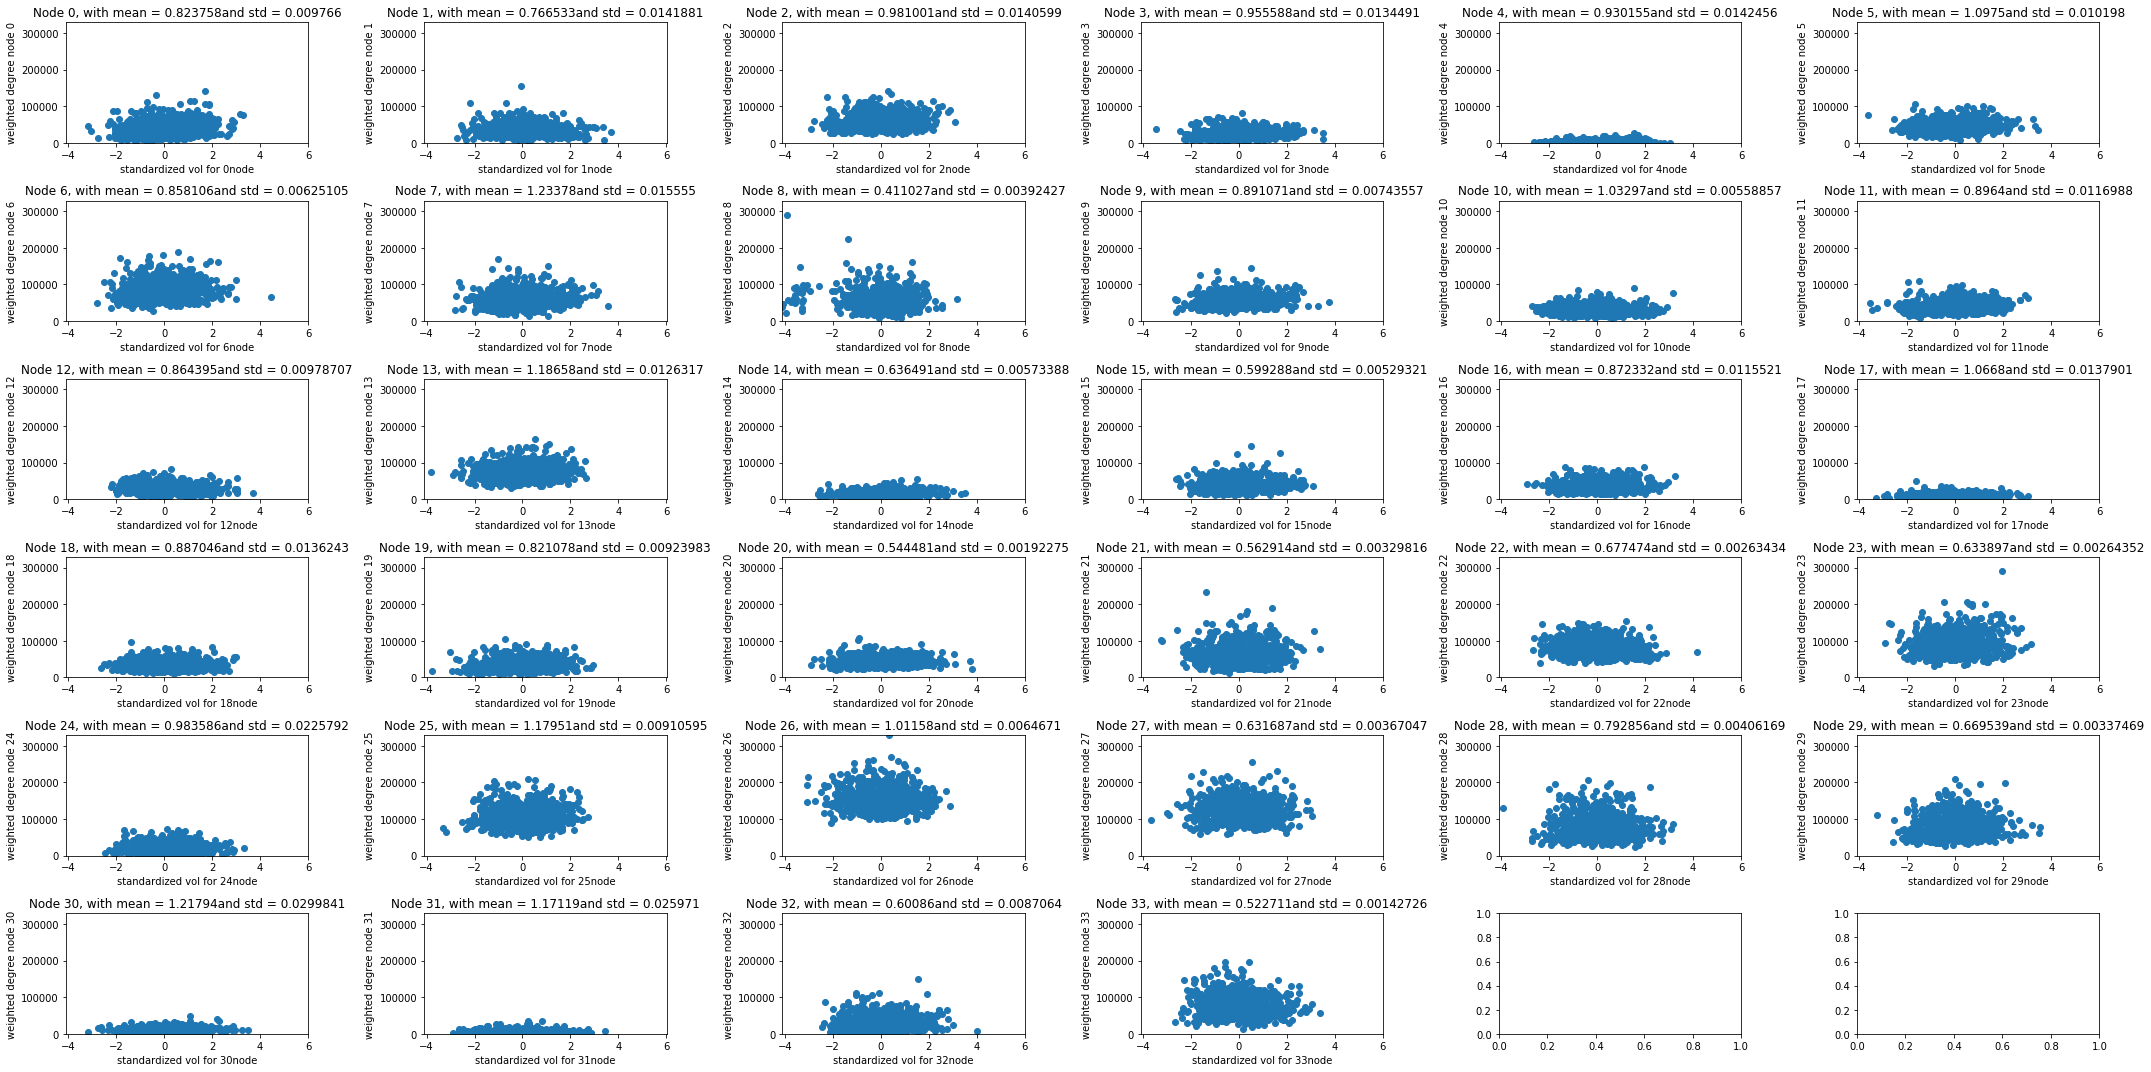

In [16]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break   

        ax[i, j].scatter(st_vol[:,idx[i,j]], wdeg[:,idx[i,j]])
        #ax[i, 1].scatter(st_vol[:, 34 + i], wdeg[:, 34+i])
        ax[i, j].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_vol[idx[i,j]]) + 'and std = ' + str(std_vol[idx[i,j]]))

        #ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_vol[34 +i]) +'and std = ' + str(std_vol[34 + i]))
        ax[i, j].set_xlabel('standardized vol for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('weighted degree node ' + str(idx[i,j]))
        #ax[i, 1].set_xlabel('standardized vol for ' + str(34 + i) + 'node')
        #ax[i, 1].set_ylabel('weighted degree node' + str(34 + i))
        ax[i, j].set_xlim([min_st_vol, max_st_vol])
        ax[i, j].set_ylim([min_wdeg, max_wdeg])
        #ax[i, 1].set_xlim([min_st_vol, max_st_vol])
        #ax[i, 1].set_ylim([min_wdeg, max_wdeg])
plt.tight_layout()
plt.savefig('vol_to_wdeg', dpi = 500)

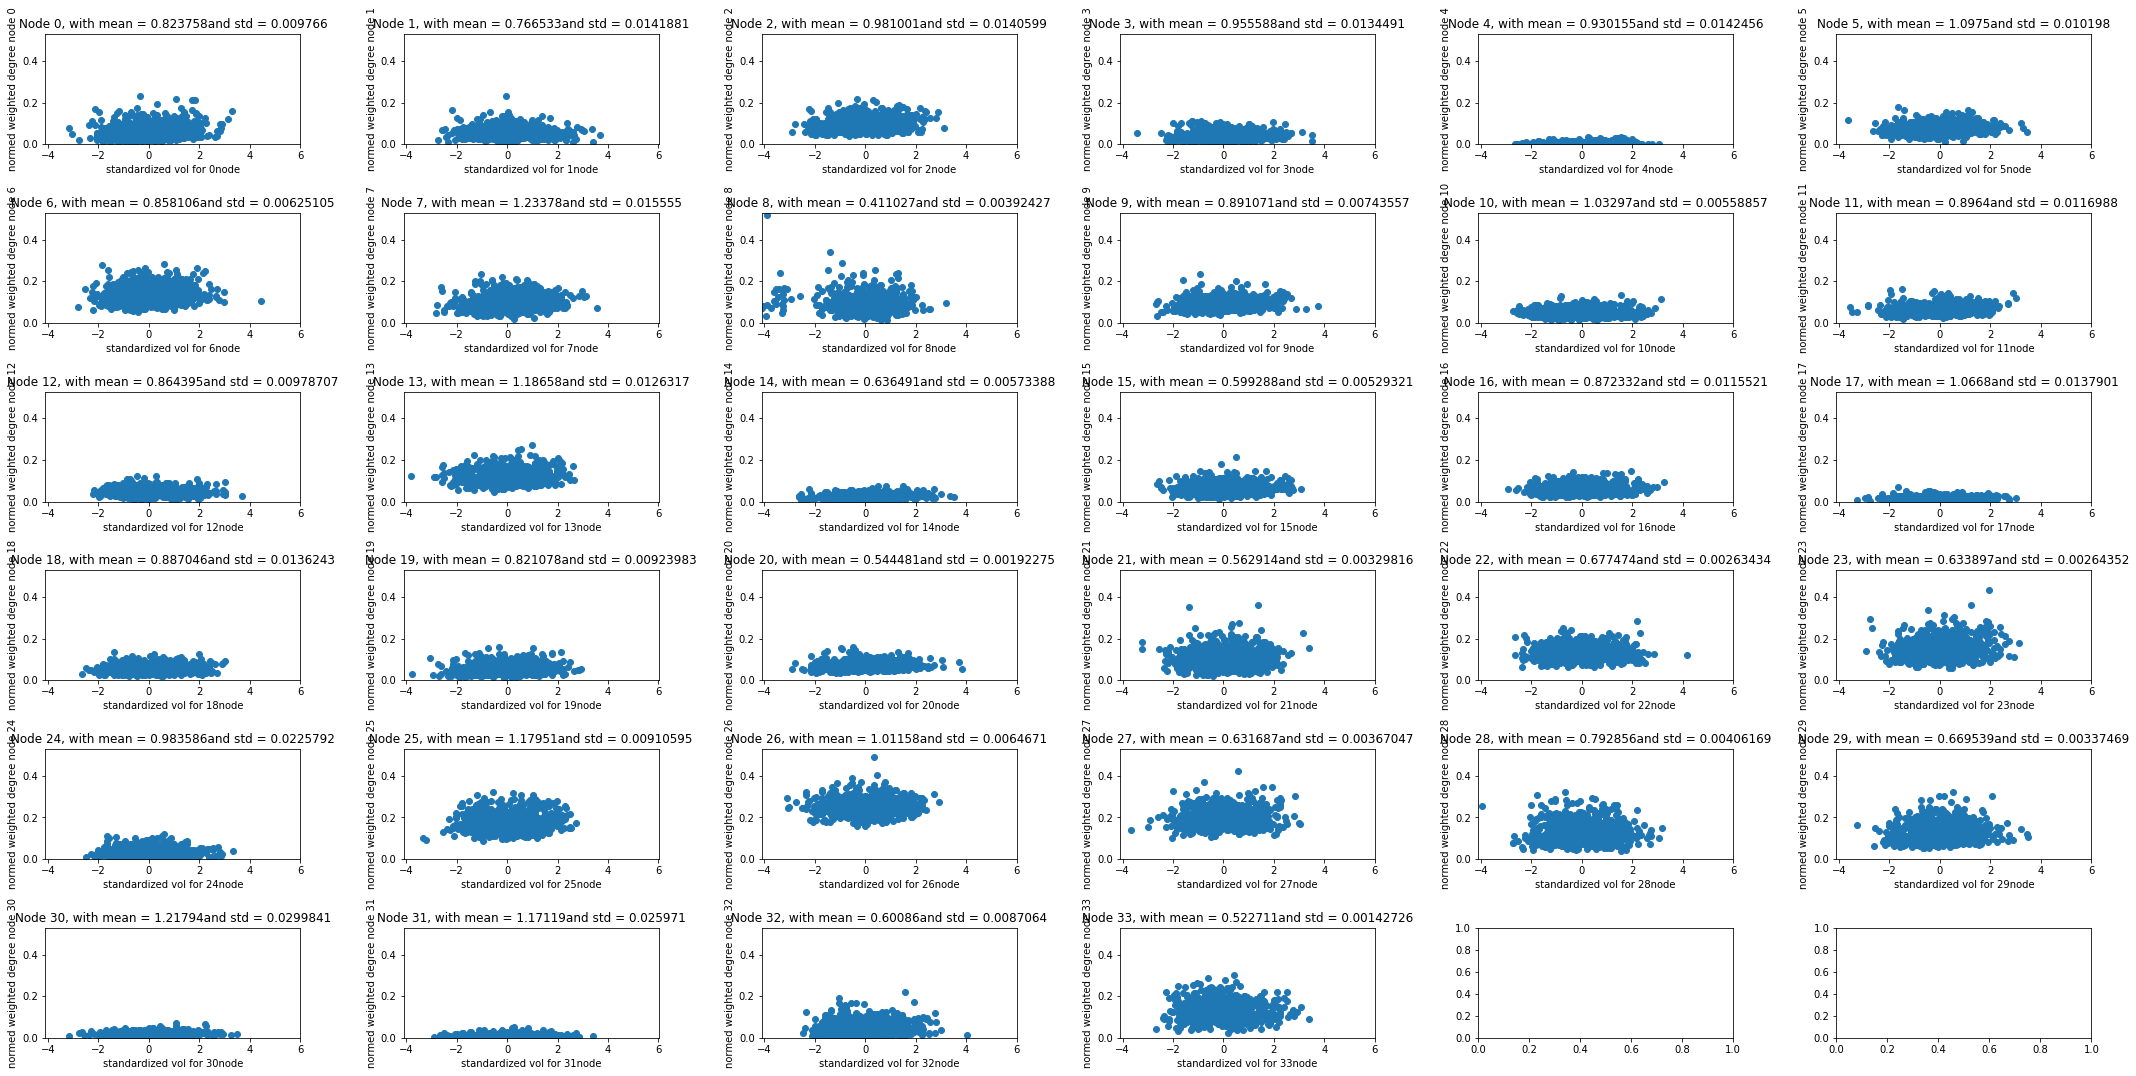

In [17]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break   

        ax[i, j].scatter(st_vol[:,idx[i,j]], norm_wdeg[:,idx[i,j]])
        #ax[i, 1].scatter(st_vol[:, 34 + i], norm_wdeg[:, 34+i])
        ax[i, j].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_vol[idx[i,j]]) + 'and std = ' + str(std_vol[idx[i,j]]))

        #ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_vol[34 +i]) +'and std = ' + str(std_vol[34 + i]))
        ax[i, j].set_xlabel('standardized vol for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('normed weighted degree node ' + str(idx[i,j]))
        #ax[i, 1].set_xlabel('standardized vol for ' + str(34 + i) + 'node')
        #ax[i, 1].set_ylabel('normed weighted degree node' + str(34 + i))
        ax[i, j].set_xlim([min_st_vol, max_st_vol])
        ax[i, j].set_ylim([min_norm_wdeg, max_norm_wdeg])
        #ax[i, 1].set_xlim([min_st_vol, max_st_vol])
        #ax[i, 1].set_ylim([min_norm_wdeg, max_norm_wdeg])
plt.tight_layout()
plt.savefig('vol_to_norm_wdeg', dpi = 500)

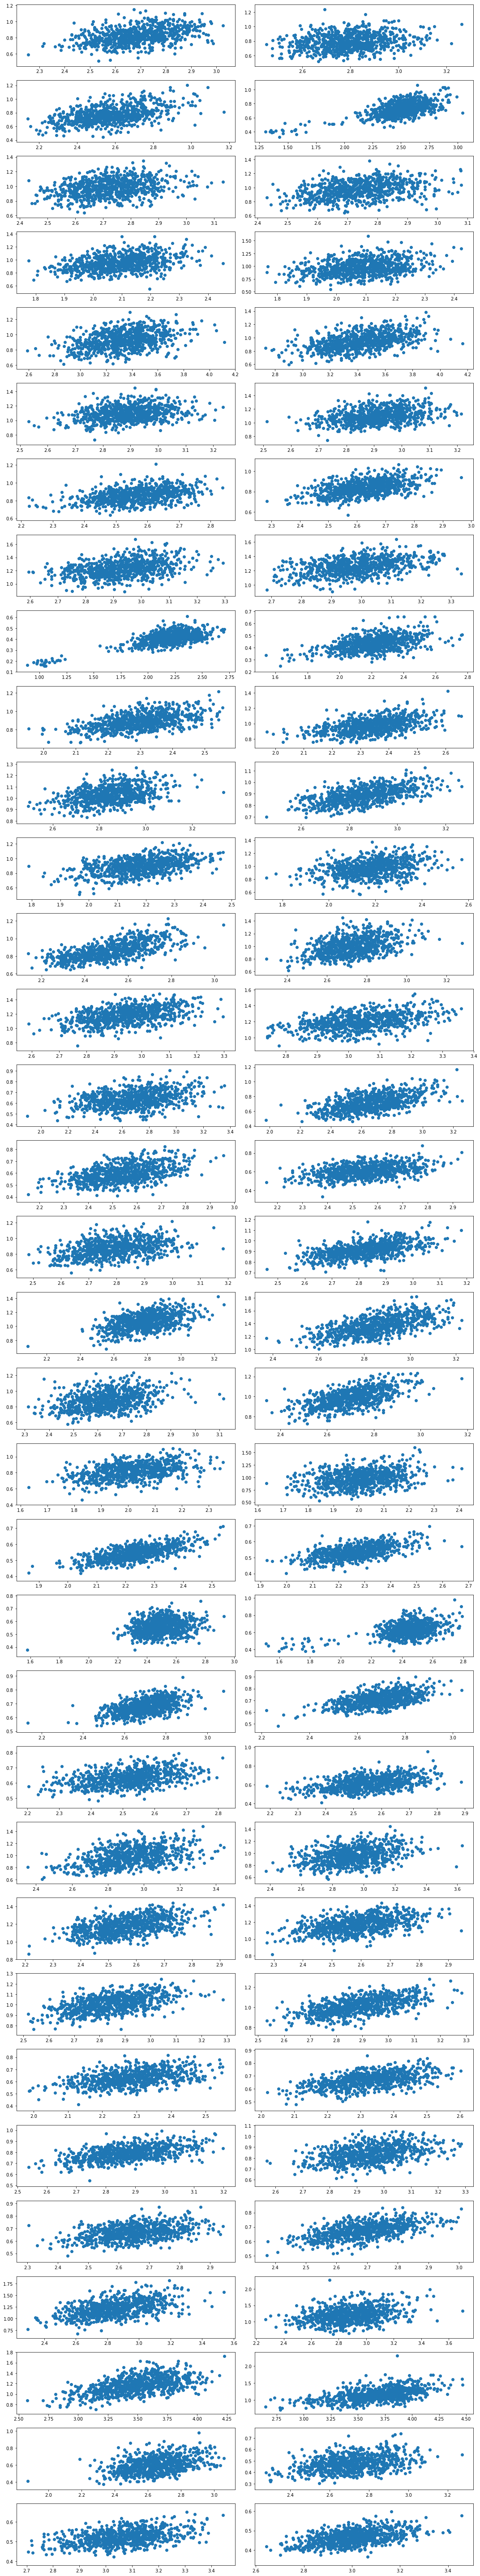

In [11]:
%matplotlib inline
fig, ax = plt.subplots(34, 2, figsize = (15,80))
for i in range(34):
    
    ax[i, 0].scatter(roi_think[:,i], roi_vol[:,i])
    ax[i, 1].scatter(roi_think[:, 34 + i], roi_vol[:, 34+i])
#     ax[i, 0].set_title('Node ' + str(i) + ', with mean = ' + str(mean_vol[i]) + 'and std = ' + str(std_vol[i]))
    
#     ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_vol[34 +i]) +'and std = ' + str(std_vol[34 + i]))
#     ax[i, 0].set_xlabel('standardized vol for ' + str(i) + 'node')
#     ax[i, 0].set_ylabel('normed weighted degree node ' + str(i))
#     ax[i, 1].set_xlabel('standardized vol for ' + str(34 + i) + 'node')
#     ax[i, 1].set_ylabel('normed weighted degree node' + str(34 + i))
#     ax[i, 0].set_xlim([min_st_vol, max_st_vol])
#     ax[i, 0].set_ylim([min_norm_wdeg, max_norm_wdeg])
#     ax[i, 1].set_xlim([min_st_vol, max_st_vol])
#     ax[i, 1].set_ylim([min_norm_wdeg, max_norm_wdeg])
plt.tight_layout()


In [24]:
num_edges = wdeg.sum(axis = -1)

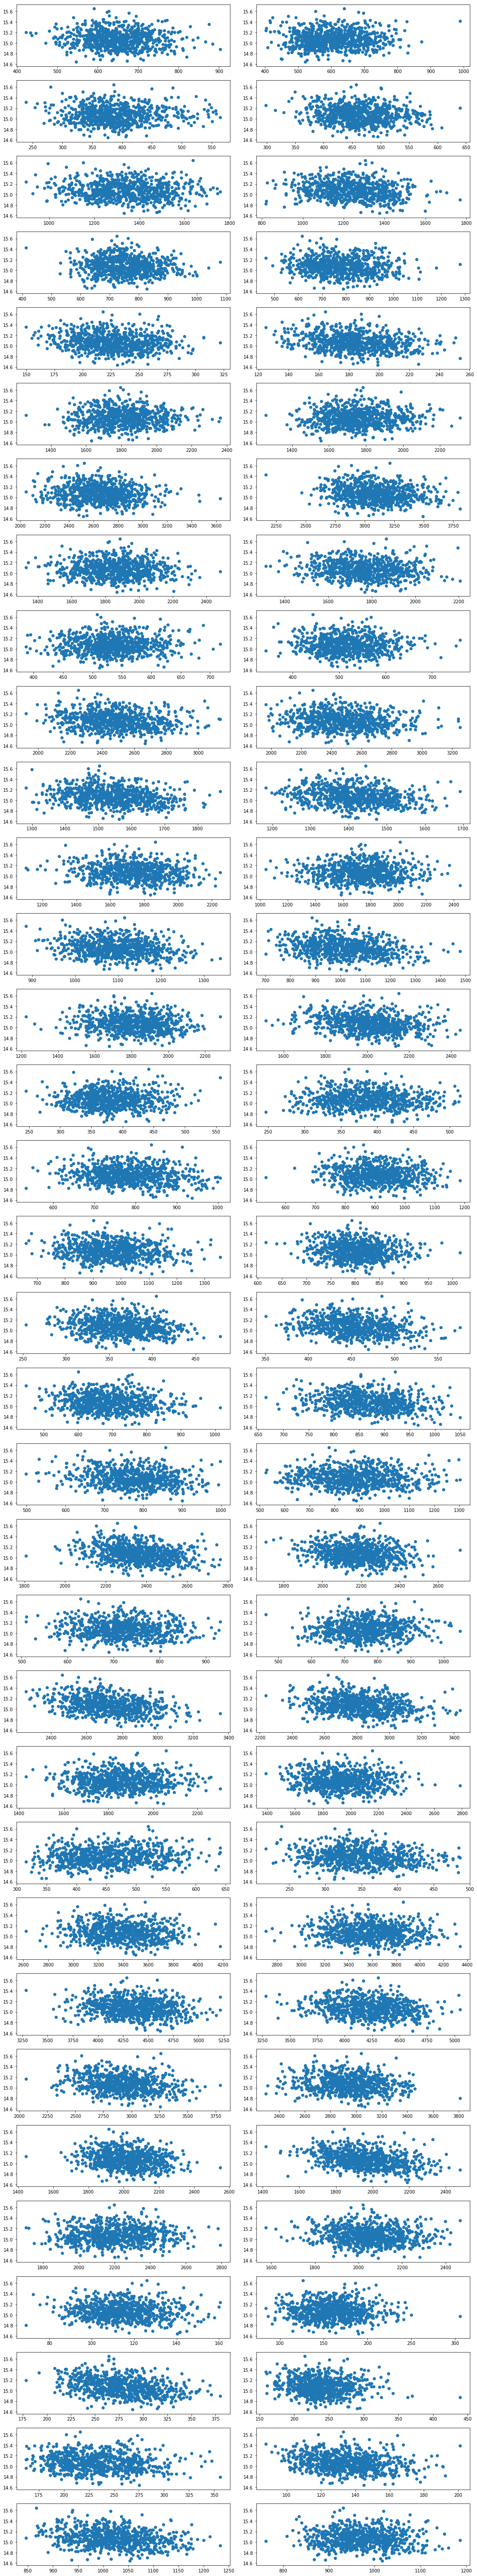

In [30]:

fig, ax = plt.subplots(34, 2, figsize = (15,80))
for i in range(34):
    
    ax[i, 0].scatter(roi_area[:,i], np.log(num_edges))
    ax[i, 1].scatter(roi_area[:, 34 + i], np.log(num_edges))
#     ax[i, 0].set_title('Node ' + str(i) + ', with mean = ' + str(mean_vol[i]) + 'and std = ' + str(std_vol[i]))
    
#     ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_vol[34 +i]) +'and std = ' + str(std_vol[34 + i]))
#     ax[i, 0].set_xlabel('standardized vol for ' + str(i) + 'node')
#     ax[i, 0].set_ylabel('normed weighted degree node ' + str(i))
#     ax[i, 1].set_xlabel('standardized vol for ' + str(34 + i) + 'node')
#     ax[i, 1].set_ylabel('normed weighted degree node' + str(34 + i))
#     ax[i, 0].set_xlim([min_st_vol, max_st_vol])
#     ax[i, 0].set_ylim([min_norm_wdeg, max_norm_wdeg])
#     ax[i, 1].set_xlim([min_st_vol, max_st_vol])
#     ax[i, 1].set_ylim([min_norm_wdeg, max_norm_wdeg])
plt.tight_layout()


# all meshes to global

In [1]:
import numpy as np
import pandas as pd
import pickle

import os

from flexible_linear import FlexibleLinearRegression

from tv_utils import CustomTVReg, integration_mesh_to_tria, get_meshes_coord_tria, get_nodes_attribute
from data_load import load_meshes_coor_tria

from joblib import Parallel, delayed

from tv_utils import get_all_attr

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


path_data = "/nmnt/x01-hdd/HCP/data/"

with open(path_data + "mean_mesh_labels", 'rb') as f:
    mean_labels = pickle.load(f)

with open(path_data + "subjects_log_jac", 'rb') as f:
    log_jac = pickle.load(f)

with open(path_data + "subjects_thinkness", 'rb') as f:
    thinkness = pickle.load(f)

with open(path_data + "subjects_mesh_area", 'rb') as f:
    mesh_area = pickle.load(f)

with open(path_data + 'modularity', 'rb') as f:
    modularity = pickle.load(f)

    
thinkness = thinkness.reshape(789,-1)
log_jac = log_jac.reshape(789,-1)
mesh_area = mesh_area.reshape(789,-1)


path_res = '/home/ayagoz/connec/results/'
                   

coord, tria = load_meshes_coor_tria(path_data)

X = integration_mesh_to_tria(tria, thinkness)
X.shape

custom_tvl2 = CustomTVReg(data = tria, mode_reg= 'l2')
flexl2 = FlexibleLinearRegression(C=1e-8, reg_cost_func=custom_tvl2.tv_normed_cost_func)

path_res = '/nmnt/media/home/ayagoz/HCP/connec/results/tv/all_meshes_to_global/'


import time

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
st = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, modularity)
flexl2.fit(X_train, y_train)
print(time.time() - st)
r2_test = r2_score(y_test, flexl2.predict(X_test))
r2_train = r2_score(y_train, flexl2.predict(X_train))
data = pd.DataFrame(data =[r2_train, r2_test], columns=['train', 'test'])
data.to_csv(path_res + 'flexl2')

In [27]:
from sklearn.preprocessing import StandardScaler

In [57]:
i = 0

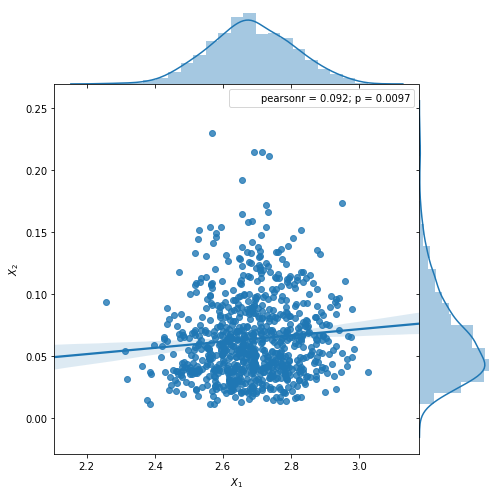

In [58]:

x1 = pd.Series(roi_think[:,i], name="$X_1$")
x2 = pd.Series(Y.sum(axis = -1)[:,i], name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="reg", size=7, space=0)

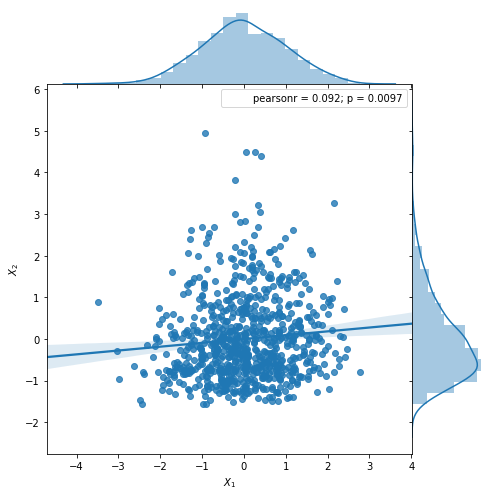

In [59]:
sc = StandardScaler()
st_roi_think = sc.fit_transform(roi_think)
st_wdeg = sc.fit_transform(Y.sum(axis = -1))
x1 = pd.Series(st_roi_think[:,i], name="$X_1$")
x2 = pd.Series(st_wdeg[:,i], name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="reg", size=7, space=0)

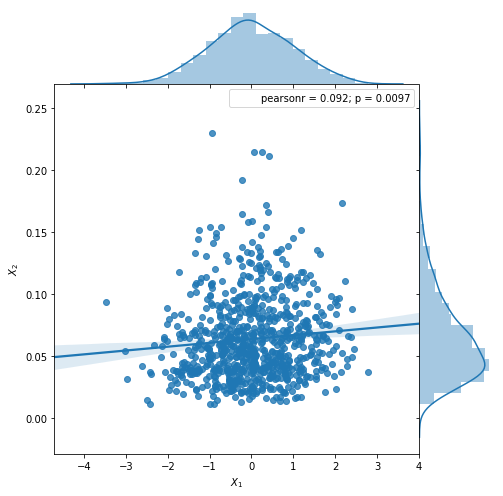

In [60]:
sc = StandardScaler()
st_roi_think = sc.fit_transform(roi_think)
st_wdeg = sc.fit_transform(Y.sum(axis = -1))
x1 = pd.Series(st_roi_think[:,i], name="$X_1$")
x2 = pd.Series(Y.sum(axis = -1)[:,i], name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="reg", size=7, space=0)

In [72]:
data1 = pd.DataFrame(data = roi_think, columns=['roi_think' + str(i) for i in range(68)])
data2 = pd.DataFrame(data =  Y.sum(axis = -1), columns=['wdeg' + str(i) for i in range(68)])
data = pd.concat([data1,data2], axis = 1)


In [74]:
sns.pairplot(data, kind = 'reg', x_vars=['roi_think' + str(i) for i in range(68)], 
             y_vars=['wdeg' + str(i) for i in range(68)])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


30


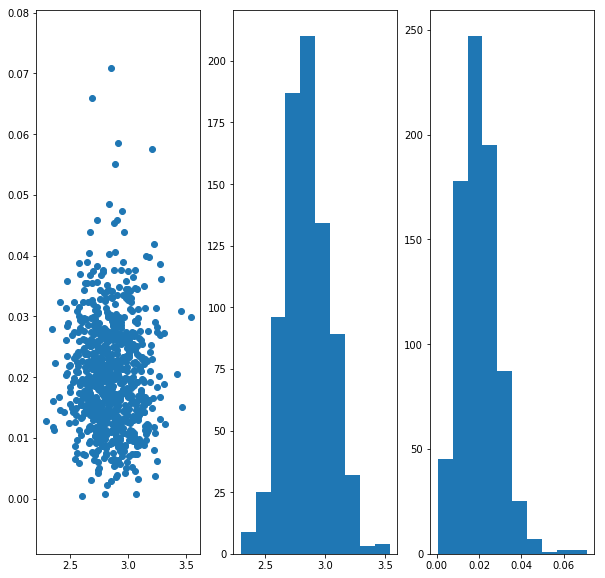

In [52]:
fig, ax = plt.subplots(1,3, figsize = (10,10))
i = np.random.randint(0, 68)
print(i)
ax[0].scatter(roi_think[:,i], Y.sum(axis = -1)[:,i])
ax[1].hist(roi_think[:,i])
ax[2].hist(Y.sum(axis = -1)[:,i]);

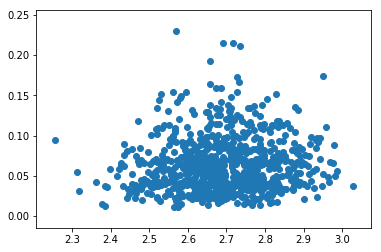

In [7]:
i = 0
plt.scatter(roi_think[:,i], Y.sum(axis = -1)[:,i]);

48


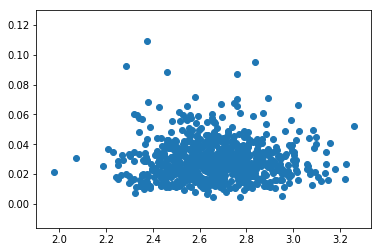

In [8]:
i = np.random.randint(0, 68)
print(i)
plt.scatter(roi_think[:,i], Y.sum(axis = -1)[:,i]);

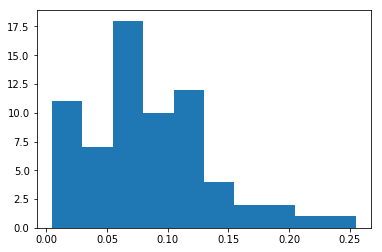

In [12]:
plt.hist(Y.sum(axis = -1).mean(axis = 0));

17


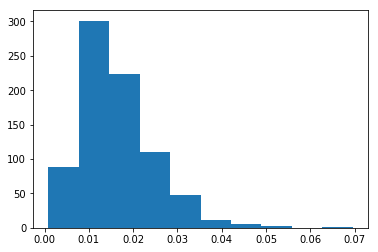

In [15]:
i = np.random.randint(0,68)
print(i)
plt.hist(Y.sum(axis = -1)[:,i]);

In [ ]:
fig, ax = plt.subplots(10,1, figsize = (200,180))
for i in range(10):
    ax[i].scatter(roi_think[:,i], Y.sum(axis = -1)[:,i])

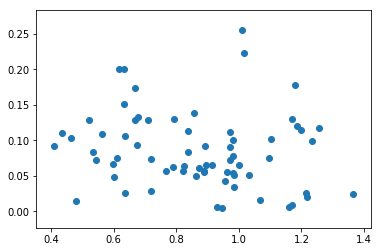

In [7]:
plt.scatter(roi_vol.mean(axis = 0), Y.sum(axis = -1).mean(axis = 0))

In [2]:
path_res = '/nmnt/media/home/ayagoz/HCP/connec/results/'
if not os.path.exists(path_res):
    os.mkdir(path_res)
path_res += 'tv/'
if not os.path.exists(path_res):
    os.mkdir(path_res)

In [3]:
path_res

'/nmnt/media/home/ayagoz/HCP/connec/results/tv/'

In [4]:
if not os.path.exists(path_res + 'node_to_node'):
    os.mkdir(path_res + 'node_to_node')
path_res += 'node_to_node/'

thinkness = thinkness.reshape(789,-1)
log_jac = log_jac.reshape(789,-1)
mesh_area = mesh_area.reshape(789,-1)

idx_nodes = list(range(1,4)) + list(range(5,39)) + list(range(40,71))
idx_nodes = np.array(idx_nodes)
print(idx_nodes.shape)
X = []
triangles = []
for i in range(68):
    node1 = idx_nodes[i]
    print(i)
    node1_tria = get_meshes_coord_tria(tria, mean_labels, node1)
    print(np.array(node1_tria).shape)
    triangles += [node1_tria] 
    T = integration_mesh_to_tria(node1_tria, thinkness)
    L = integration_mesh_to_tria(node1_tria, log_jac)
    M = integration_mesh_to_tria(node1_tria, mesh_area)
    X += [[T,L,M]]
    
print('I am here')

(68,)
0
(4015, 3)
1
(2598, 3)
2
(7167, 3)
3
(3086, 3)
4
(1421, 3)
5
(9167, 3)
6
(15365, 3)
7
(8516, 3)
8
(5598, 3)
9
(12392, 3)
10
(8057, 3)
11
(8116, 3)
12
(6253, 3)
13
(8617, 3)
14
(3029, 3)
15
(6368, 3)
16
(5901, 3)
17
(1763, 3)
18
(3885, 3)
19
(3591, 3)
20
(18418, 3)
21
(6358, 3)
22
(20975, 3)
23
(14240, 3)
24
(2575, 3)
25
(14289, 3)
26
(23890, 3)
27
(20503, 3)
28
(14128, 3)
29
(16869, 3)
30
(468, 3)
31
(1499, 3)
32
(1939, 3)
33
(11399, 3)
34
(4125, 3)
35
(3146, 3)
36
(6794, 3)
37
(3129, 3)
38
(1196, 3)
39
(8967, 3)
40
(18953, 3)
41
(8080, 3)
42
(5270, 3)
43
(11632, 3)
44
(8609, 3)
45
(7565, 3)
46
(5335, 3)
47
(9778, 3)
48
(2699, 3)
49
(7365, 3)
50
(4731, 3)
51
(1755, 3)
52
(4531, 3)
53
(3438, 3)
54
(17671, 3)
55
(5803, 3)
56
(20889, 3)
57
(15575, 3)
58
(1979, 3)
59
(15401, 3)
60
(23388, 3)
61
(19997, 3)
62
(13309, 3)
63
(15948, 3)
64
(674, 3)
65
(1371, 3)
66
(1414, 3)
67
(12168, 3)
I am here


In [29]:
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
d = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)


In [54]:


name = ['think/', 'log_jac/', 'mesh_area/']
params = {'C':[1e-8],
         'cost_func': ['l2',]}


def main_worker(i, data, target, j, trian):
    node1 = idx_nodes[i]
    print(node1)
    custom_tvl1 = CustomTVReg(data = trian, mode_reg= 'l1')
    custom_tvl2 = CustomTVReg(data = trian, mode_reg= 'l2')

    flexl1 = FlexibleLinearRegression(C=1e-8, reg_cost_func=custom_tvl1.tv_normed_cost_func)
    flexl2 = FlexibleLinearRegression(C=1e-8, reg_cost_func=custom_tvl2.tv_normed_cost_func)
    grl1 = GridSearchCV(flexl1, param_grid=params, n_jobs=-1, scoring='r2', cv = 3)
    grl2 = GridSearchCV(flexl2, param_grid=params, n_jobs=-1, scoring='r2', cv = 3)

    for folder in name:
        if not os.path.exists(path_res + folder):
            os.mkdir(path_res + folder)

    print(data[0].shape, target[:,i].shape)



    for k in range(3):

        grl1.fit(data[k], target[:,i])
        grl2.fit(data[k], target[:,i])
        res_l1 = pd.DataFrame.from_dict(grl1.cv_results_)
        res_l1 = res_l1.sort_values(by = 'rank_test_score').iloc[:1]
        res_l1.to_csv(path_res + name[j] + 'tv_l1')

        res_l2 = pd.DataFrame.from_dict(grl2.cv_results_)
        res_l2 = res_l2.sort_values(by = 'rank_test_score').iloc[:1]
        res_l2.to_csv(path_res + name[j] + 'tv_l2')
    

In [ ]:
for j, target in enumerate(targets_data):
    print(targets_name[j])
    print(target.shape)
    Parallel(n_jobs=28)(delayed(main_worker)(i, target, j, triangles[i]) for i in range(68))
    print('Finished work for ' + targets_name[j])
print('I finished all')

In [55]:
%timeit
Parallel(n_jobs=1)(delayed(main_worker)(i, X[i] targets_data[i], i, triangles[i]) for i in range(1))

1
(789, 4015) (789,)


[None]

In [138]:
name = ['think/', 'log_jac/', 'mesh_area/']
params = {'C':[5*1e-5, ], 
         'cost_func': ['l2']}

custom_tvl2 = CustomTVReg(data = triangles[64], mode_reg= 'l2')
flexl2 = FlexibleLinearRegression(C=1e-8, reg_cost_func=custom_tvl2.tv_normed_cost_func)
grl2 = GridSearchCV(flexl2, param_grid=params, n_jobs=1, scoring='r2', cv = 2)

path_res = '/nmnt/media/home/ayagoz/HCP/connec/results/tv/node_to_node/'

for folder in name:
    if not os.path.exists(path_res + folder):
        os.mkdir(path_res + folder)

print(np.array(X[64]).shape, targets_data[0].shape)

import time

st = time.time()
grl2.fit(X[64][0], targets_data[0][:,64])

res_l2 = pd.DataFrame.from_dict(grl2.cv_results_)
    
print(time.time() - st)

In [146]:
res_l2.sort_values(by ='rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_cost_func,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.872842,0.00062,-9.254394,-9.254077,5e-05,l2,"{'C': 5e-05, 'cost_func': 'l2'}",1,-9.504224,-9.00393,-9.00393,-9.504224,0.034681,0.000021,0.250146,0.250147
